<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import misc

Returns the poisson distribution

$$P_m(x) = \frac{m^x e^{-m}}{x!} $$

In [3]:
def poisson(x, mean):
    return np.exp(-mean)*(mean**x)/sp.special.factorial(x)

Computes the chi squared distribution for different values of $m$ above.

In [4]:
def compute_chi2(m, count_act, freq_act, num_events):
    
    tot = 0
    for count, freq in zip(count_act, freq_act):
        theo = num_events*poisson(count, m) 
        tot += ((freq-theo)**2)/(theo)
        
    return tot

# Setting Up the Input Voltage

In [5]:
volt_top = np.array([1.2, 1.246, 1.303, 1.352, 1.402, 1.421, 1.440, 1.460, 1.482, 1.500, 
           1.520, 1.540, 1.562, 1.579, 1.599, 1.652, 1.701, 1.429])
counts_top = np.array([225, 367, 632, 722, 837, 935, 941, 1097, 1293, 1363, 1515, 1646, 1724,
             1936, 2131, 2497, 2798, 949])

volt_bot = np.array([1.196, 1.244, 1.267, 1.298, 1.326, 1.359, 1.393, 1.438, 1.216, 1.231, 
                     1.156, 1.102])
counts_bot = np.array([787, 1032, 1143, 1448, 1615, 1982, 2096, 2570, 882, 931, 699, 443])


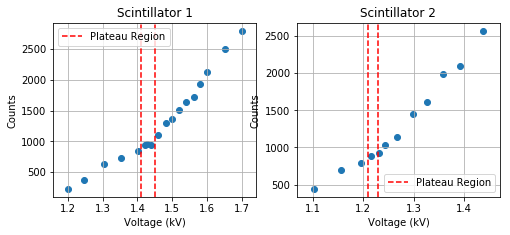

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8,3.2))

axes[0].scatter(volt_top, counts_top)
axes[0].set_xlabel('Voltage (kV)')
axes[0].set_ylabel('Counts')
axes[0].set_title('Scintillator 1')

axes[1].scatter(volt_bot, counts_bot)
axes[1].set_xlabel('Voltage (kV)')
axes[1].set_ylabel('Counts')
axes[1].set_title('Scintillator 2')

axes[0].axvline(1.41, color='r', linestyle='--', label='Plateau Region')
axes[0].axvline(1.45, color='r', linestyle='--')
axes[0].legend()

axes[1].axvline(1.21, color='r', linestyle='--', label='Plateau Region')
axes[1].axvline(1.23, color='r', linestyle='--')
axes[1].legend()

axes[0].grid()
axes[1].grid()

plt.show()

# Counting Data

## 3 Count Interval Bottom Scintillator 1.23V

Open data:

In [7]:
df = pd.read_csv('plateau_data/solo_3.txt', skiprows=12, names=['counts'])
data = df['counts'][0:315].astype(int)
num_events = len(data)

Get Distributions:

In [8]:
freq_act, _ = np.histogram(data, max(data)-min(data)+1)
count_act = np.arange(min(data), max(data)+1, 1)
freq_theo = num_events*poisson(count_act, np.mean(data)) 

Plots poisson with $m=$ the mean of the data (not necessarily the best fit).

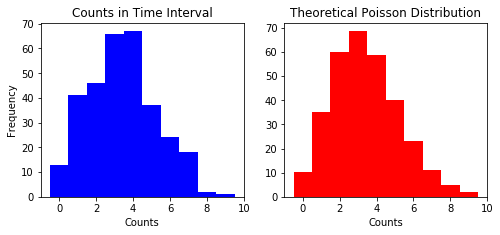

In [9]:
fig, ax = plt.subplots(1,2, figsize=(8,3.2))


ax[0].bar(count_act, freq_act, width=1, color='b')
ax[1].bar(count_act, freq_theo, width=1, color='r')

ax[0].set_xlabel('Counts')
ax[1].set_xlabel('Counts')
ax[0].set_ylabel('Frequency')

ax[0].set_title('Counts in Time Interval')
ax[1].set_title('Theoretical Poisson Distribution')

plt.show()

### Compute Optimal m for Poisson Distribution

In [10]:
num_bins = len(count_act)
DOF = num_bins - 2

In [11]:
m=np.linspace(3, 4, 100)
chi_test = compute_chi2(m, count_act, freq_act, num_events)

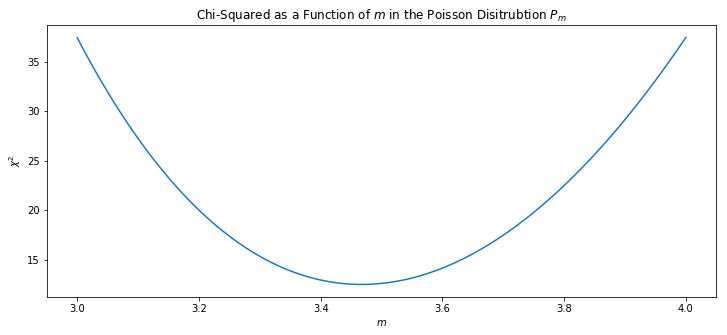

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(m, chi_test)
ax.set_title('Chi-Squared as a Function of $m$ in the Poisson Disitrubtion $P_m$')
ax.set_xlabel('$m$')
ax.set_ylabel('$\chi^2$')

plt.show()

Print the value of $m$ that corresponds to the smallest $\chi^2$ value.

In [13]:
i = np.argmin(chi_test)
m[i]

3.4646464646464645

Print the minimum value of $\chi^2$.

In [14]:
min(chi_test)

12.510103933772273

In [15]:
print(np.min(chi_test)/(DOF))

1.563762991721534


## 50 Counts Bottom Scintillator 1.23V

Open DataFrame:

In [16]:
df = pd.read_csv('plateau_data/solo_50.txt', skiprows=12, names=['counts'])
data = df['counts'][0:305].astype(int)
num_events = len(data)

Get Data:

In [17]:
freq_act, _ = np.histogram(data, max(data)-min(data)+1)
count_act = np.arange(min(data), max(data)+1, 1)
freq_theo = num_events*poisson(count_act, np.mean(data)) 

Plotting:

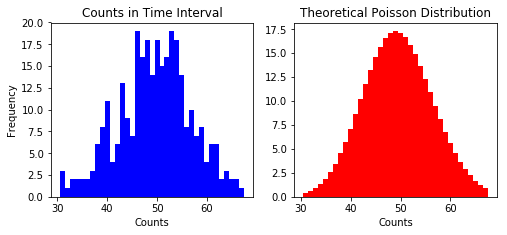

In [18]:
fig, ax = plt.subplots(1,2, figsize=(8,3.2))


ax[0].bar(count_act, freq_act, width=1, color='b')
ax[1].bar(count_act, freq_theo, width=1, color='r')

ax[0].set_xlabel('Counts')
ax[1].set_xlabel('Counts')
ax[0].set_ylabel('Frequency')

ax[0].set_title('Counts in Time Interval')
ax[1].set_title('Theoretical Poisson Distribution')

plt.show()

### Compute Optimal m for Poisson Distribution

In [19]:
num_bins = len(count_act)
DOF = num_bins - 2

In [20]:
m=np.linspace(45, 55, 100)
chi_test = compute_chi2(m, count_act, freq_act, num_events)

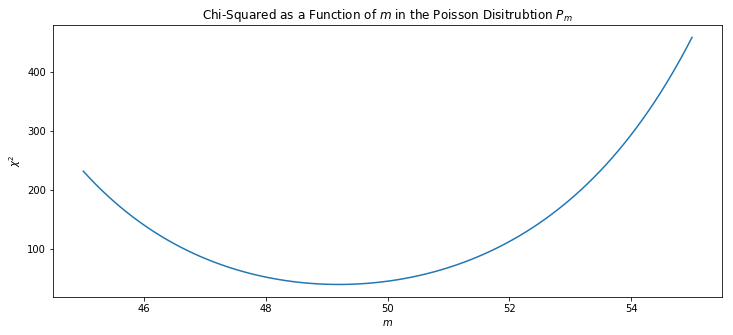

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(m, chi_test)
ax.set_title('Chi-Squared as a Function of $m$ in the Poisson Disitrubtion $P_m$')
ax.set_xlabel('$m$')
ax.set_ylabel('$\chi^2$')

plt.show()

Print the value of $m$ that corresponds to the smallest $\chi^2$ value.

In [22]:
i = np.argmin(chi_test)
m[i]

49.24242424242424

Print the minimum value of $\chi^2$.

In [23]:
min(chi_test)

40.31720588723792

In [24]:
print(np.min(chi_test)/(DOF))

1.1519201682067977


## 3 Count Interval Both Scintillators Top 1.43V Bot 1.23V

In [25]:
df = pd.read_csv('plateau_data/in_sync_3.txt', skiprows=12, names=['counts'])
data = df['counts'][0:305].astype(int)
num_events = len(data)

In [26]:
freq_act, _ = np.histogram(data, max(data)-min(data)+1)
count_act = np.arange(min(data), max(data)+1, 1)
freq_theo = num_events*poisson(count_act, np.mean(data)) 

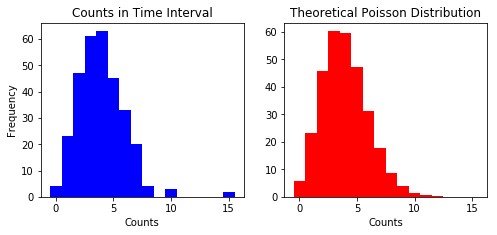

In [27]:
fig, ax = plt.subplots(1,2, figsize=(8,3.2))


ax[0].bar(count_act, freq_act, width=1, color='b')
ax[1].bar(count_act, freq_theo, width=1, color='r')

ax[0].set_xlabel('Counts')
ax[1].set_xlabel('Counts')
ax[0].set_ylabel('Frequency')

ax[0].set_title('Counts in Time Interval')
ax[1].set_title('Theoretical Poisson Distribution')

plt.show()

### Compute Optimal m for Poisson Distribution

In [28]:
num_bins = len(count_act)
DOF = num_bins - 2

In [29]:
m=np.linspace(4.5, 6.0, 100)
chi_test = compute_chi2(m, count_act, freq_act, num_events)

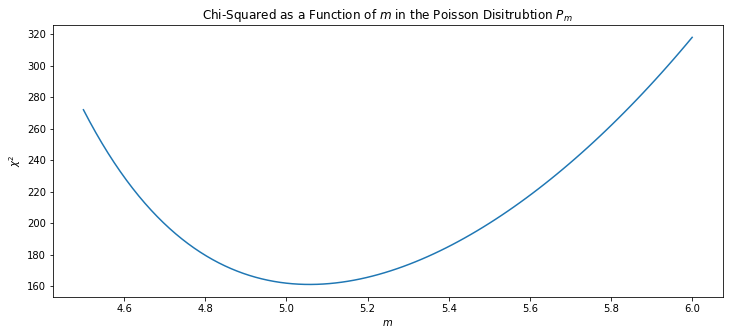

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(m, chi_test)
ax.set_title('Chi-Squared as a Function of $m$ in the Poisson Disitrubtion $P_m$')
ax.set_xlabel('$m$')
ax.set_ylabel('$\chi^2$')

plt.show()

Print the value of $m$ that corresponds to the smallest $\chi^2$ value.

In [31]:
i = np.argmin(chi_test)
m[i]

5.0606060606060606

Print the minimum value of $\chi^2$.

In [32]:
min(chi_test)

161.15289389938766

In [33]:
print(np.min(chi_test)/(DOF))

11.510920992813405


## 50 Count Interval Both Scintillators Top 1.43V Bot 1.23V

In [34]:
df = pd.read_csv('plateau_data/in_sync_50.txt', skiprows=12, names=['counts'])
data = df['counts'][0:305].astype(int)
num_events = len(data)

In [35]:
freq_act, _ = np.histogram(data, max(data)-min(data)+1)
count_act = np.arange(min(data), max(data)+1, 1)
freq_theo = num_events*poisson(count_act, np.mean(data)) 

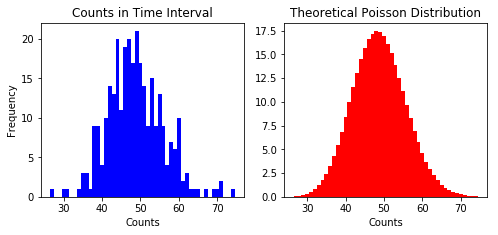

In [36]:
fig, ax = plt.subplots(1,2, figsize=(8,3.2))


ax[0].bar(count_act, freq_act, width=1, color='b')
ax[1].bar(count_act, freq_theo, width=1, color='r')

ax[0].set_xlabel('Counts')
ax[1].set_xlabel('Counts')
ax[0].set_ylabel('Frequency')

ax[0].set_title('Counts in Time Interval')
ax[1].set_title('Theoretical Poisson Distribution')

plt.show()

### Compute Optimal m for Poisson Distribution

In [37]:
num_bins = len(count_act)
DOF = num_bins - 2

In [38]:
m=np.linspace(45, 56, 100)
chi_test = compute_chi2(m, count_act, freq_act, num_events)

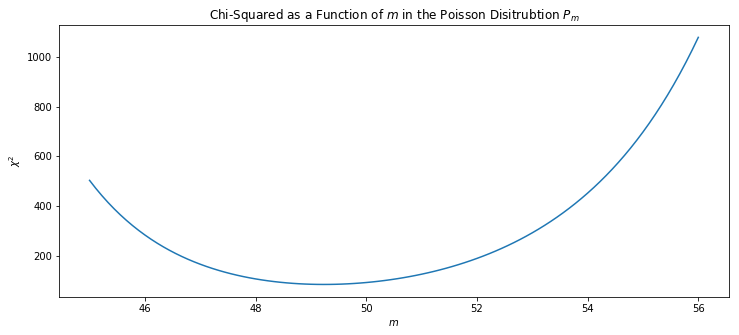

In [39]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(m, chi_test)
ax.set_title('Chi-Squared as a Function of $m$ in the Poisson Disitrubtion $P_m$')
ax.set_xlabel('$m$')
ax.set_ylabel('$\chi^2$')

plt.show()

Print the value of $m$ that corresponds to the smallest $\chi^2$ value.

In [40]:
i = np.argmin(chi_test)
m[i]

49.22222222222222

Print the minimum value of $\chi^2$.

In [41]:
min(chi_test)

84.20424670300027

In [42]:
print(np.min(chi_test)/DOF)

1.8305271022391363


# Conclusion

$\chi^2$ is higher for the scintillators in sync than it is apart. This suggests that cosmic rays are not poisson distributed. This is understandable:

"Poisson Probability Distribution requires events to occur with a constant rate and independtly of the last event."

While the extra noise picked up by 1 scintillator on its own is poisson distribtued (and helps lower the chi-square value) the 2 scintillators on top of eachother (which isolate cosmic events) measure only the cosmic ray data which is inherently non-poisson.

The reason cosmic rays are non-poisson is because events are influenced by previous events. This is obvious by just looking at the counter, the particles tend to come in packets: i.e a particle is more likely to be measured directly after another event. 